In [1]:
import sys
import os
import pandas as pd

import seaborn as sns

import numpy as np

In [2]:
project_root = os.path.abspath("../../")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(sys.path)
print(project_root)

import exp_driver.experiment as E

['/data/marci/mjakowsk/EDS4AI/DeficitProject', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python311.zip', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/lib-dynload', '', '/home/mjakowsk/.local/lib/python3.11/site-packages', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/site-packages']
/data/marci/mjakowsk/EDS4AI/DeficitProject


In [3]:
params = {
    #"deficit_params" : {"deficit_duration":0}
}
exps = E.match_experiments(directories=["disimilarity", "similarity", "random_subset"], params=params)

In [4]:
print(len(exps))

352


In [5]:
deficit_type = []
final_test_acc = []
deficit_onset = []
deficit_duration = []
training_duration = []
id = []
accuracy_diff = []
convergence_epochs = []
total_durations = []

baseline_accuracy = 93.40

for exp_id, dir in exps:
    config = E.get_config(exp_id=exp_id, dir=dir)
    deficit_params = config["deficit_params"]

    if deficit_params["start_epoch"] > 320:
        continue
    #if deficit_params["start_epoch"] > 40:
        #continue

    onset = deficit_params["start_epoch"]
    end = deficit_params["end_epoch"]

    _, _, _, test_accs = E.get_data(exp_id=exp_id, dir= dir)

    final_acc = test_accs[-1]
    acc_diff = baseline_accuracy - final_acc

    if config['deficit_name'] == "SimilarityTypeDeficit" :
        deficit_type.append(deficit_params["type"])
    else :
        deficit_type.append("random")

    num_post_epochs = config["num_epochs"] - end
    
    final_test_acc.append(final_acc)
    deficit_onset.append(onset)
    deficit_duration.append(end-onset)
    training_duration.append(config["num_epochs"])
    accuracy_diff.append(acc_diff)
    id.append(exp_id)
    convergence_epochs.append(num_post_epochs)
    total_durations.append(config["num_epochs"])
    



df = pd.DataFrame({
    "Type" : deficit_type,
    "Accuracy" : final_test_acc,
    "Window Onset (epoch)" : deficit_onset,
    "Window Duration" : deficit_duration,
    "Training Duration" : training_duration,
    "ID" : id,
    "Test Accuracy Decrease" : accuracy_diff,
    'Post Epochs' : convergence_epochs,
    "Total Duration" : total_durations,
                  })
    
    
#filt = (df["Window Duration"] <= 40)
#filt = (df["Window Duration"] == 30) | (df["Window Duration"] == 40)

####
#filt = (df["Window Duration"] == 40) 
##s = sns.lineplot(data=df[df["Window Duration"]==30], x='Window Onset (epoch)', 
#s = sns.lineplot(data=df[filt], x='Window Onset (epoch)', 
                 #y='Test Accuracy Decrease', hue='Type', style="Window Duration", marker='o', )
#s.set_title("Sliding Window Experiment Sensitivity")

#print(len(df))

#params = {
    #"deficit_params":{"start_epoch":0, "end_epoch":0}
#}
#directories = [
    #"../deficit_removal/random_subset_AVG",
    #"../deficit_removal/similarity_AVG"
#]
#exps2 = E.match_experiments(directories=directories, params=params)
#print(len(exps))

#sum = 0
#_,_,test_loss,test_accs = E.get_data(exps[0][0], exps[0][1])
#df2 = pd.DataFrame({'epoch':np.arange(len(test_loss)), 'loss':test_loss})
#sns.lineplot(data=df2, x='epoch', y='loss', ax=s)

Text(0.5, 1.0, 'Sliding Window Experiment Sensitivity')

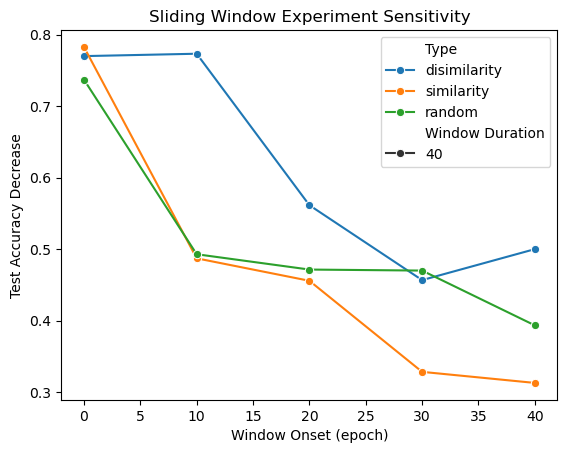

In [6]:
#s = sns.lineplot(data=df[df["Window Duration"]==30], x='Window Onset (epoch)', 


#filt = (df["Window Duration"] == 40)  
filt = (df["Window Duration"] == 40)  & (df["Post Epochs"] >= 250) & (df["Window Onset (epoch)"] <= 40)
#filt = (df["Window Duration"] == 40)  & ( (df["Total Duration"] == 300) | (df["Total Duration"] ==  250))
s = sns.lineplot(data=df[filt], x='Window Onset (epoch)', 
                 y='Test Accuracy Decrease', hue='Type', style="Window Duration", marker='o', errorbar=None)
s.set_title("Sliding Window Experiment Sensitivity")

/tmp/ipykernel_366313/2359696868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['same count'] = (


98


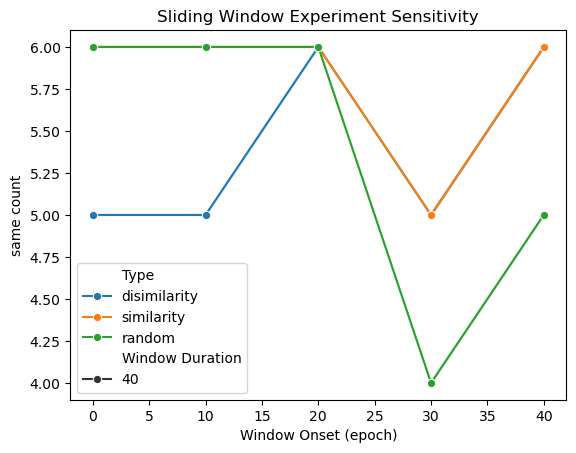

In [7]:
#filt = (df["Window Duration"] == 40) 

df3 = df[filt]
# Count how many OTHER experiments share the same (epoch, type)
df3['same count'] = (
    df3.groupby(['Window Onset (epoch)', 'Type'], dropna=False)['Window Onset (epoch)'].transform('size') - 1
)
#print(df3)
#s = sns.lineplot(data=df3[df3["Type"] == "random"], x='Window Onset (epoch)', 
s = sns.lineplot(data=df3, x='Window Onset (epoch)', 
                 y='same count', hue='Type', style="Window Duration", marker='o', )
s.set_title("Sliding Window Experiment Sensitivity")

print(len(df3))


In [8]:
#df3
#df3
# Set options to display all rows, columns, and full column width
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.width', 1000) # Adjust as needed for your screen 


#s = sns.lineplot(data=df3, x='Window Onset (epoch)', 
                 #y='same count', hue='Type', style="Window Duration", marker='o', )
#s.set_title("Sliding Window Experiment Sensitivity")

df3

,Type,Accuracy,Window Onset (epoch),Window Duration,Training Duration,ID,Test Accuracy Decrease,Post Epochs,Total Duration,same count
0,disimilarity,92.72,0,40,520,0hUWZwxx,0.68,480,520,5
1,disimilarity,92.96,20,40,520,kVggaQn2,0.44,460,520,6
2,disimilarity,92.81,40,40,520,pcVap1oU,0.59,440,520,6
24,disimilarity,92.58,10,40,300,ortVfKRO,0.82,250,300,5
28,disimilarity,92.69,20,40,310,IQfQGot2,0.71,250,310,6
...,...,...,...,...,...,...,...,...,...,...
327,random,93.10,30,40,320,wISB3SWN,0.30,250,320,4
328,random,93.01,40,40,330,tufEvgFs,0.39,250,330,5
329,random,92.71,0,40,290,9Nptuq47,0.69,250,290,6
330,random,92.94,10,40,300,sphmpfoO,0.46,250,300,6


352


Text(0.5, 1.0, 'Baseline Sensitivity')

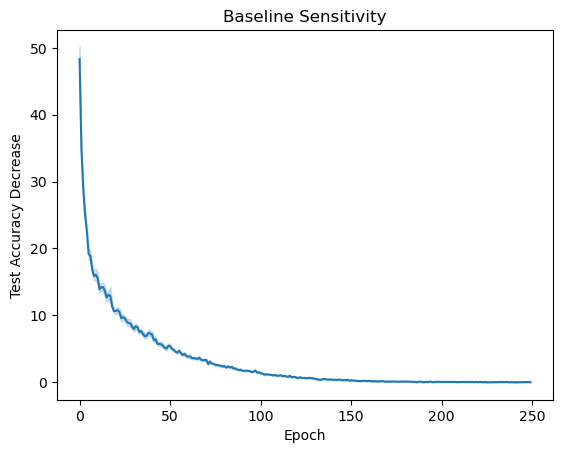

In [9]:


params = {
    "deficit_params":{"start_epoch":0, "end_epoch":0}
}
directories = [
    "../deficit_removal/random_subset_AVG",
    "../deficit_removal/similarity_AVG"
]
exps2 = E.match_experiments(directories=directories, params=params)
print(len(exps))

#sum = 0
#_,_,test_loss,test_accs = E.get_data(exps2[0][0], exps2[0][1])
#sens = np.full((len(test_accs)), 93.4) - np.array(test_accs)
#df2 = pd.DataFrame({'Epoch':np.arange(len(test_loss)), 'Test Accuracy Decrease':sens})
#ax = sns.lineplot(data=df2, x='Epoch', y='Test Accuracy Decrease', )
#ax.set_title("Baseline Sensitivity")
df_list = []
for exp_id, dir in exps2:

    _,_,_,test_accs = E.get_data(exp_id, dir)  # list/array same length as epochs
    sens = np.full((len(test_accs)), 93.4) - np.array(test_accs)
    epochs = np.arange(len(test_accs))
    df_list.append(pd.DataFrame({
        "Epoch": epochs,
        "Test Accuracy Decrease": sens 
    }))

df2 = pd.concat(df_list, ignore_index=True)
ax = sns.lineplot(data=df2, x='Epoch', y='Test Accuracy Decrease', )
ax.set_title("Baseline Sensitivity")

In [10]:
df2

,Epoch,Test Accuracy Decrease
0,0,49.73
1,1,39.44
2,2,27.51
3,3,31.50
4,4,22.87
...,...,...
4995,245,0.33
4996,246,0.30
4997,247,0.35
4998,248,0.27


In [11]:
#pd.set_option("display.max_rows", 50) 
#pd.set_option("display.max_rows", None) 

df[df["Window Duration"] == 100]

,Type,Accuracy,Window Onset (epoch),Window Duration,Training Duration,ID,Test Accuracy Decrease,Post Epochs,Total Duration
11,disimilarity,89.11,0,100,350,IIXLUK27,4.29,250,350
12,disimilarity,89.09,0,100,350,KmLuC49W,4.31,250,350
13,disimilarity,88.18,0,100,350,R5MFoNcp,5.22,250,350
14,disimilarity,89.11,0,100,350,1yO5Joir,4.29,250,350
15,disimilarity,88.80,0,100,350,WzsXzhEf,4.60,250,350
...,...,...,...,...,...,...,...,...,...
264,random,93.08,100,100,450,HhelCylW,0.32,250,450
265,random,93.16,120,100,470,yPrL0tmk,0.24,250,470
266,random,93.54,240,100,590,3Goe1BJr,-0.14,250,590
267,random,93.51,280,100,630,5DRhC9nE,-0.11,250,630


In [12]:
df

,Type,Accuracy,Window Onset (epoch),Window Duration,Training Duration,ID,Test Accuracy Decrease,Post Epochs,Total Duration
0,disimilarity,92.72,0,40,520,0hUWZwxx,0.68,480,520
1,disimilarity,92.96,20,40,520,kVggaQn2,0.44,460,520
2,disimilarity,92.81,40,40,520,pcVap1oU,0.59,440,520
3,disimilarity,92.95,60,40,520,qFAoFKVp,0.45,420,520
4,disimilarity,93.27,80,40,520,9AwqbttC,0.13,400,520
...,...,...,...,...,...,...,...,...,...
327,random,93.10,30,40,320,wISB3SWN,0.30,250,320
328,random,93.01,40,40,330,tufEvgFs,0.39,250,330
329,random,92.71,0,40,290,9Nptuq47,0.69,250,290
330,random,92.94,10,40,300,sphmpfoO,0.46,250,300


In [13]:
a = E.match_experiments(["random_subset", "disimilarity"],params={"exp_id":"BuibqDEN"})
len(a)

0

352
352


Text(0.5, 1.0, 'Sliding Window Experiment at Removal')

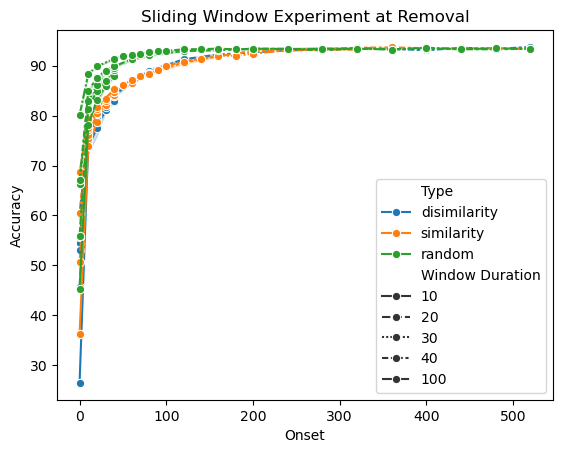

In [14]:

deficit_type = []
removal_test_acc = []
deficit_onset = []
deficit_duration = []
training_duration = []
id = []

for exp_id, dir in exps:
    id.append(exp_id)

    config = E.get_config(exp_id=exp_id, dir=dir)
    deficit_params = config["deficit_params"]

    onset = deficit_params["start_epoch"]
    end = deficit_params["end_epoch"]

    _, _, _, test_accs = E.get_data(exp_id=exp_id, dir= dir)

    full_duration = config["num_epochs"]
    if end-1 <= full_duration-1 :
        removal_acc = test_accs[end-1]
    else :
        removal_acc = test_accs[full_duration-1]
    #removal_acc = test_accs[-1]
    #removal_epoch = end-1 if end <= config["num_epochs"] else config["num_epochs"]
    #removal_acc = test_accs[removal_epoch]

    if config['deficit_name'] == "SimilarityTypeDeficit" :
        deficit_type.append(deficit_params["type"])
    else :
        deficit_type.append("random")

    
    removal_test_acc.append(removal_acc)
    deficit_onset.append(onset)
    deficit_duration.append(end-onset)
    training_duration.append(config["num_epochs"])

print(len(deficit_duration))
print(len(removal_test_acc))

df = pd.DataFrame({
    "Type" : deficit_type,
    "Accuracy" : removal_test_acc,
    "Onset" : deficit_onset,
    "Window Duration" : deficit_duration,
    "Training Duration" : training_duration,
    "ID" : id,
                  })
    
s = sns.lineplot(data=df, x='Onset', y='Accuracy', hue='Type', style="Window Duration", marker='o')
s.set_title("Sliding Window Experiment at Removal")
#df
#print(removal_test_acc)

In [15]:
df

,Type,Accuracy,Onset,Window Duration,Training Duration,ID
0,disimilarity,53.14,0,40,520,0hUWZwxx
1,disimilarity,78.51,20,40,520,kVggaQn2
2,disimilarity,83.76,40,40,520,pcVap1oU
3,disimilarity,87.03,60,40,520,qFAoFKVp
4,disimilarity,89.33,80,40,520,9AwqbttC
...,...,...,...,...,...,...
347,random,88.86,30,40,320,wISB3SWN
348,random,90.20,40,40,330,tufEvgFs
349,random,67.49,0,40,290,9Nptuq47
350,random,84.62,10,40,300,sphmpfoO
